<a href="https://colab.research.google.com/github/nishant-harinkhede12/NLP-and-Deep-Learing/blob/main/LSTM_Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#STOCK MARKET PREDICTION AND ANALYSIS BY LSTM

In [2]:
url = 'https://raw.githubusercontent.com/nishant-harinkhede12/Advanced-M-L-projects/main/AAPL.csv'

In [3]:
import pandas as pd
df=pd.read_csv(url)

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-19,119.959999,120.419998,115.660004,115.980003,115.238815,120639300
1,2020-10-20,116.199997,118.980003,115.629997,117.510002,116.759026,124423700
2,2020-10-21,116.669998,118.709999,116.449997,116.870003,116.123123,89946000
3,2020-10-22,117.449997,118.040001,114.589996,115.750000,115.010284,101988000
4,2020-10-23,116.389999,116.550003,114.279999,115.040001,114.304810,82572600


In [5]:
df1=df.reset_index()['Close']

In [ ]:
df1

0      115.980003
1      117.510002
2      116.870003
3      115.750000
4      115.040001
          ...    
247    141.509995
248    140.910004
249    143.759995
250    144.839996
251    146.550003
Name: Close, Length: 252, dtype: float64

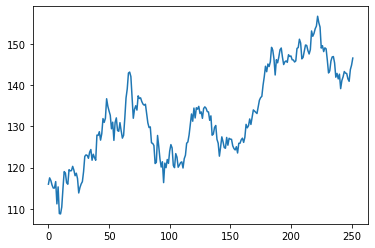

In [6]:
import matplotlib.pyplot as plt
plt.plot(df1)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [7]:

import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
print(df1.shape)
print(df1[0:5])

(252, 1)
[[0.15045921]
 [0.1823874 ]
 [0.16903183]
 [0.14565948]
 [0.13084314]]


##splitting dataset into train and test split

For timeseries data, we must divide the data in different way b'coz, todays closing price of stock is dependent on previous days closing


In [9]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [10]:
training_size,test_size

(163, 89)

In [11]:
train_data[:15]

array([[0.15045921],
       [0.1823874 ],
       [0.16903183],
       [0.14565948],
       [0.13084314],
       [0.13105186],
       [0.16339733],
       [0.05070951],
       [0.13668619],
       [0.00187821],
       [0.        ],
       [0.03484985],
       [0.12896493],
       [0.21410686],
       [0.20701177]])

In [12]:
test_data[0:15]

array([[0.45304668],
       [0.43551753],
       [0.44616016],
       [0.48038384],
       [0.45262954],
       [0.49102679],
       [0.52608507],
       [0.52024202],
       [0.51419041],
       [0.50792991],
       [0.54277962],
       [0.57512525],
       [0.58827227],
       [0.59474132],
       [0.6508766 ]])

# convert an array of values into a dataset matrix as 
todays closing price of stock is dependent on previous days closing

In [13]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###iteration=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t,t+1,t+2,t+3 and Y=t+4


In [14]:
time_step = 75
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(87, 75)
(87,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(13, 75)
(13,)


(None, None)

# reshape input to be [samples, time steps, features] which is required for LSTM

In [17]:

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Create the Stacked LSTM model

In [18]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(75,1)))#75 features
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 75, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 75, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
2/2 [==============================] - 7s 1s/step - loss: 0.1223 - val_loss: 0.1751
Epoch 2/100
2/2 [==============================] - 0s 136ms/step - loss: 0.0503 - val_loss: 0.0096
Epoch 3/100
2/2 [==============================] - 0s 146ms/step - loss: 0.0173 - val_loss: 0.0184
Epoch 4/100
2/2 [==============================] - 0s 144ms/step - loss: 0.0323 - val_loss: 0.0017
Epoch 5/100
2/2 [==============================] - 0s 136ms/step - loss: 0.0145 - val_loss: 0.0258
Epoch 6/100
2/2 [==============================] - 0s 144ms/step - loss: 0.0129 - val_loss: 0.0557
Epoch 7/100
2/2 [==============================] - 0s 144ms/step - loss: 0.0172 - val_loss: 0.0624
Epoch 8/100
2/2 [==============================] - 0s 136ms/step - loss: 0.0172 - val_loss: 0.0491
Epoch 9/100
2/2 [==============================] - 0s 133ms/step - loss: 0.0132 - val_loss: 0.0287
Epoch 10/100
2/2 [==============================] - 0s 149ms/step - loss: 0.0105 - val_loss: 0.0125
Epoch 11/100

In [22]:
import tensorflow as tf

### Lets Do the prediction and check performance metrics

In [23]:

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

##Transformback to original form
Reverse scaling

In [26]:

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Calculate RMSE performance metrics

In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

127.01466137506014

### Test Data RMSE

In [28]:

math.sqrt(mean_squared_error(ytest,test_predict))

128.65546561599976

### Plotting 
# shift train predictions for plotting

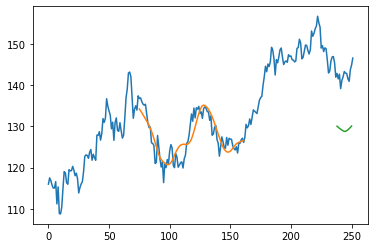

In [31]:

look_back=75
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [32]:
len(test_data)

89

In [52]:
x_input=test_data[14:].reshape(1,-1)
x_input.shape

(1, 75)

In [53]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [54]:
temp_input[0:15]

[0.6508766015362477,
 0.6938648483029164,
 0.7470785948373755,
 0.7193239650121073,
 0.7583472497550869,
 0.7456176809664354,
 0.7694073070317917,
 0.842654273512701,
 0.8286726806476752,
 0.7850583905406516,
 0.7028379901045501,
 0.78004993947726,
 0.7643988559683996,
 0.7936143996646079,
 0.8303421712915098]

In [55]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=75
i=0
while(i<30):
    
    if(len(temp_input)>75):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.46452853]
76
1 day input [0.69386485 0.74707859 0.71932397 0.75834725 0.74561768 0.76940731
 0.84265427 0.82867268 0.78505839 0.70283799 0.78004994 0.76439886
 0.7936144  0.83034217 0.83931561 0.79298838 0.75563429 0.76940731
 0.77399833 0.76690324 0.8053005  0.79674449 0.79904    0.77984136
 0.77879789 0.76857273 0.77399833 0.83722867 0.84161112 0.88376447
 0.86435728 0.78443239 0.79152746 0.82262105 0.85434069 0.85246231
 0.82616861 0.80905659 0.83117706 0.9255007  0.89858098 0.91277115
 0.93656077 0.95012523 1.         0.96702836 0.94532565 0.83889816
 0.85100171 0.82116014 0.8401502  0.83514173 0.77817189 0.71306347
 0.72328866 0.77378976 0.79424042 0.79611847 0.76377283 0.69156936
 0.71076798 0.68301335 0.70701155 0.63376458 0.6748748  0.6934474
 0.72036712 0.71222858 0.71035053 0.68322192 0.67070124 0.73017517
 0.75271276 0.78839737 0.46452853]
1 day output [[0.46844587]]
2 day input [0.74707859 0.71932397 0.75834725 0.74561768 0.76940731 0.84265427
 0.82867268 0.78505839 0.70

In [58]:
day_new=np.arange(1,76)
day_pred=np.arange(76,106) # 76+30 to pridict future 30 days

In [59]:
import matplotlib.pyplot as plt

In [64]:
len(df1)

252

In [67]:
252-75

177

# Note: 
Length of df1 is 252, we took 75 days data.

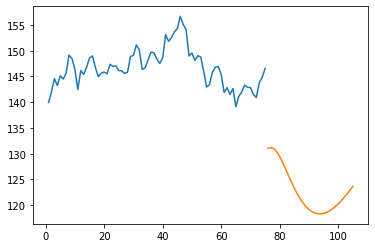

In [70]:
plt.plot(day_new,scaler.inverse_transform(df1[177:]))# Previous data
plt.plot(day_pred,scaler.inverse_transform(lst_output)) # Predicted data